In [1]:
!pip install seaborn



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

In [4]:
LDAP = pd.read_csv('LDAP11.csv')
Portmap = pd.read_csv('Portmap1.csv')
UDPLag=pd.read_csv('UDPLag11.csv')
data = pd.concat([LDAP,Portmap,UDPLag], ignore_index = True)



## DATA PREPROCESSING

In [5]:
data.head(5)

Unnamed: 0   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean  \
0          73             0             0              6       1.500000   
1          75             0             0            276     138.000000   
2      161222             0             0              4       1.333333   
3      112233             0             0              3       3.000000   
4      194026             0             0              2       2.000000   

    Bwd IAT Std   Bwd IAT Max   Bwd IAT Min SimillarHTTP   Bwd Packets/s  ...  \
0       1.00000             3             1            0       240.22293  ...   
1     190.91884           273             3            0        87.89921  ...   
2       0.57735             2             1            0     39215.68800  ...   
3       0.00000             3             3            0     31250.00000  ...   
4       0.00000             2             2            0     21505.37700  ...   

   Flow Bytes/s   Max Packet Length   Protocol.1  Fwd Packets/s  \
0    2978.76440                  31            6      48.044586   
1     703.19366                   6            6      29.299736   
2  235294.12000                   6            6    9803.922000   
3       0.00000                   0            6   15625.000000   
4  193548.39000                   6            6   10752.688000   

    Flow Packets/s  Total Length of Fwd Packets.1   Subflow Fwd Bytes  \
0       288.267520                              0                   0   
1       117.198944                              6                   6   
2     49019.610000                              0                   0   
3     46875.000000                              0                   0   
4     32258.064000                              6                   6   

   Destination Port   act_data_pkt_fwd   Label  
0               443                  0  BENIGN  
1               443                  0  BENIGN  
2             57816                  0  BENIGN  
3             43898                  0  BENIGN  
4             44764                  0  BENIGN  

[5 rows x 38 columns]

In [6]:
data.columns 

Index(['Unnamed: 0', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'SimillarHTTP', ' Bwd Packets/s', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Flow Duration',
       ' Total Length of Bwd Packets', ' Total Backward Packets', ' Protocol',
       ' Inbound', ' Timestamp', ' Source Port', ' Min Packet Length',
       ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean',
       ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count',
       ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s',
       ' Max Packet Length', ' Protocol.1', 'Fwd Packets/s', ' Flow Packets/s',
       'Total Length of Fwd Packets.1', ' Subflow Fwd Bytes',
       ' Destination Port', ' act_data_pkt_fwd', ' Label'],
      dtype='object')

In [7]:
data.shape

(15000, 38)

In [8]:
data.describe()

Unnamed: 0   Fwd IAT Max   Fwd IAT Min  Bwd IAT Total  \
count   15000.000000  1.500000e+04  1.500000e+04   1.500000e+04   
mean   128270.938267  5.416747e+06  5.677884e+04   9.356241e+06   
std    159477.823519  1.303250e+07  1.206210e+06   2.672721e+07   
min         0.000000  0.000000e+00  0.000000e+00   0.000000e+00   
25%      1168.000000  2.000000e+00  1.000000e+00   0.000000e+00   
50%     71465.500000  3.000000e+00  2.000000e+00   2.000000e+00   
75%    177065.000000  2.058458e+05  3.000000e+00   4.000000e+00   
max    610831.000000  1.097105e+08  4.915212e+07   1.199473e+08   

        Bwd IAT Mean   Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  \
count   1.500000e+04  1.500000e+04  1.500000e+04  15000.000000   
mean    7.615474e+05  1.559986e+06  4.550104e+06      1.297267   
std     2.356781e+06  4.580719e+06  1.326606e+07      3.711094   
min     0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
25%     0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
50%     2.000000e+00  0.000000e+00  2.000000e+00      1.000000   
75%     3.000000e+00  0.000000e+00  3.000000e+00      2.000000   
max     3.440100e+07  5.958428e+07  1.032030e+08     96.000000   

        Bwd Packets/s   Total Fwd Packets  ...   Fwd Packet Length Mean  \
count    1.500000e+04        15000.000000  ...             15000.000000   
mean     4.228639e+03           10.219400  ...               157.805400   
std      5.434819e+04          226.918144  ...               288.262323   
min      0.000000e+00            1.000000  ...                 0.000000   
25%      0.000000e+00            2.000000  ...                 6.000000   
50%      2.375712e-01            2.000000  ...                32.250000   
75%      9.421963e+01            6.000000  ...               169.666670   
max      2.000000e+06        20444.000000  ...              2131.000000   

       Flow Bytes/s   Max Packet Length    Protocol.1  Fwd Packets/s  \
count  1.499800e+04        15000.000000  15000.000000   1.500000e+04   
mean   1.241995e+08          366.352067     10.472533   3.284016e+05   
std    3.830021e+08          673.990813      5.487032   5.668697e+05   
min   -1.000000e+00            0.000000      0.000000   0.000000e+00   
25%    1.104596e+02            6.000000      6.000000   2.841260e+00   
50%    1.244525e+04           58.500000      6.000000   9.632519e+01   
75%    3.700000e+07          380.000000     17.000000   6.666667e+05   
max    2.944000e+09         3617.000000     17.000000   3.000000e+06   

        Flow Packets/s  Total Length of Fwd Packets.1   Subflow Fwd Bytes  \
count     1.500000e+04                   15000.000000        15000.000000   
mean      3.326302e+05                     880.637867          880.637867   
std       5.699931e+05                    3484.242497         3484.242497   
min      -1.000000e+00                       0.000000            0.000000   
25%       6.345636e+00                      24.000000           24.000000   
50%       1.926272e+02                      78.000000           78.000000   
75%       6.666667e+05                     760.000000          760.000000   
max       3.000000e+06                  188320.000000       188320.000000   

        Destination Port   act_data_pkt_fwd  
count       15000.000000       15000.000000  
mean        18349.015533           6.371267  
std         22985.496829         155.304580  
min             0.000000           0.000000  
25%            80.000000           1.000000  
50%           443.000000           1.000000  
75%         39872.250000           3.000000  
max         65519.000000       18766.000000  

[8 rows x 34 columns]

In [9]:
# Drop Unnamed:0
data = data.drop(['Unnamed: 0'], axis = 1)

In [10]:
#Detecter les valeurs nulles
data_real = data.replace(np.inf, np.nan)
data_real.isnull().sum().sum()
data_ = data_real.dropna(axis=0)
data_.isnull().sum().sum()

0

## EXPLORATORY  DATA  ANALYSIS

In [11]:
data[' Label'].value_counts()

BENIGN     9196
UDPLag     1873
Syn        1771
Portmap    1293
LDAP        406
UDP         333
NetBIOS     128
Name:  Label, dtype: int64

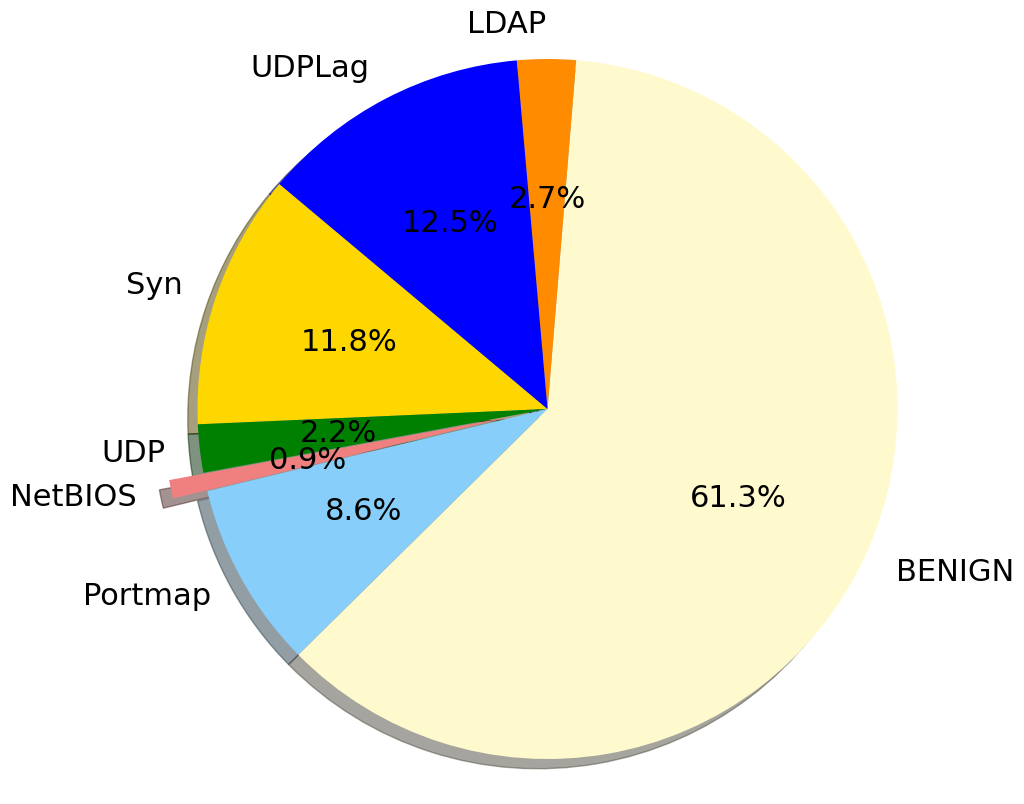

In [12]:
labels = 'Syn', 'UDP', 'NetBIOS','Portmap','BENIGN','LDAP','UDPLag'
sizes = [ len(data_[data_[' Label']=='Syn']), 
         len(data_[data_[' Label']=='UDP']), len(data_[data_[' Label']=='NetBIOS']),
         len(data_[data_[' Label']=='Portmap']),
         len(data_[data_[' Label']=='BENIGN']),len(data_[data_[' Label']=='LDAP']),len(data_[data_[' Label']=='UDPLag'])]
colors = ['gold', 'green', 'lightcoral', 'lightskyblue','lemonchiffon','darkorange','blue']
explode = ( 0, 0, 0.1,0,0,0,0)  # explode 1st slice

# Plot
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Text(0, 0.5, ' Flow Packets/s')

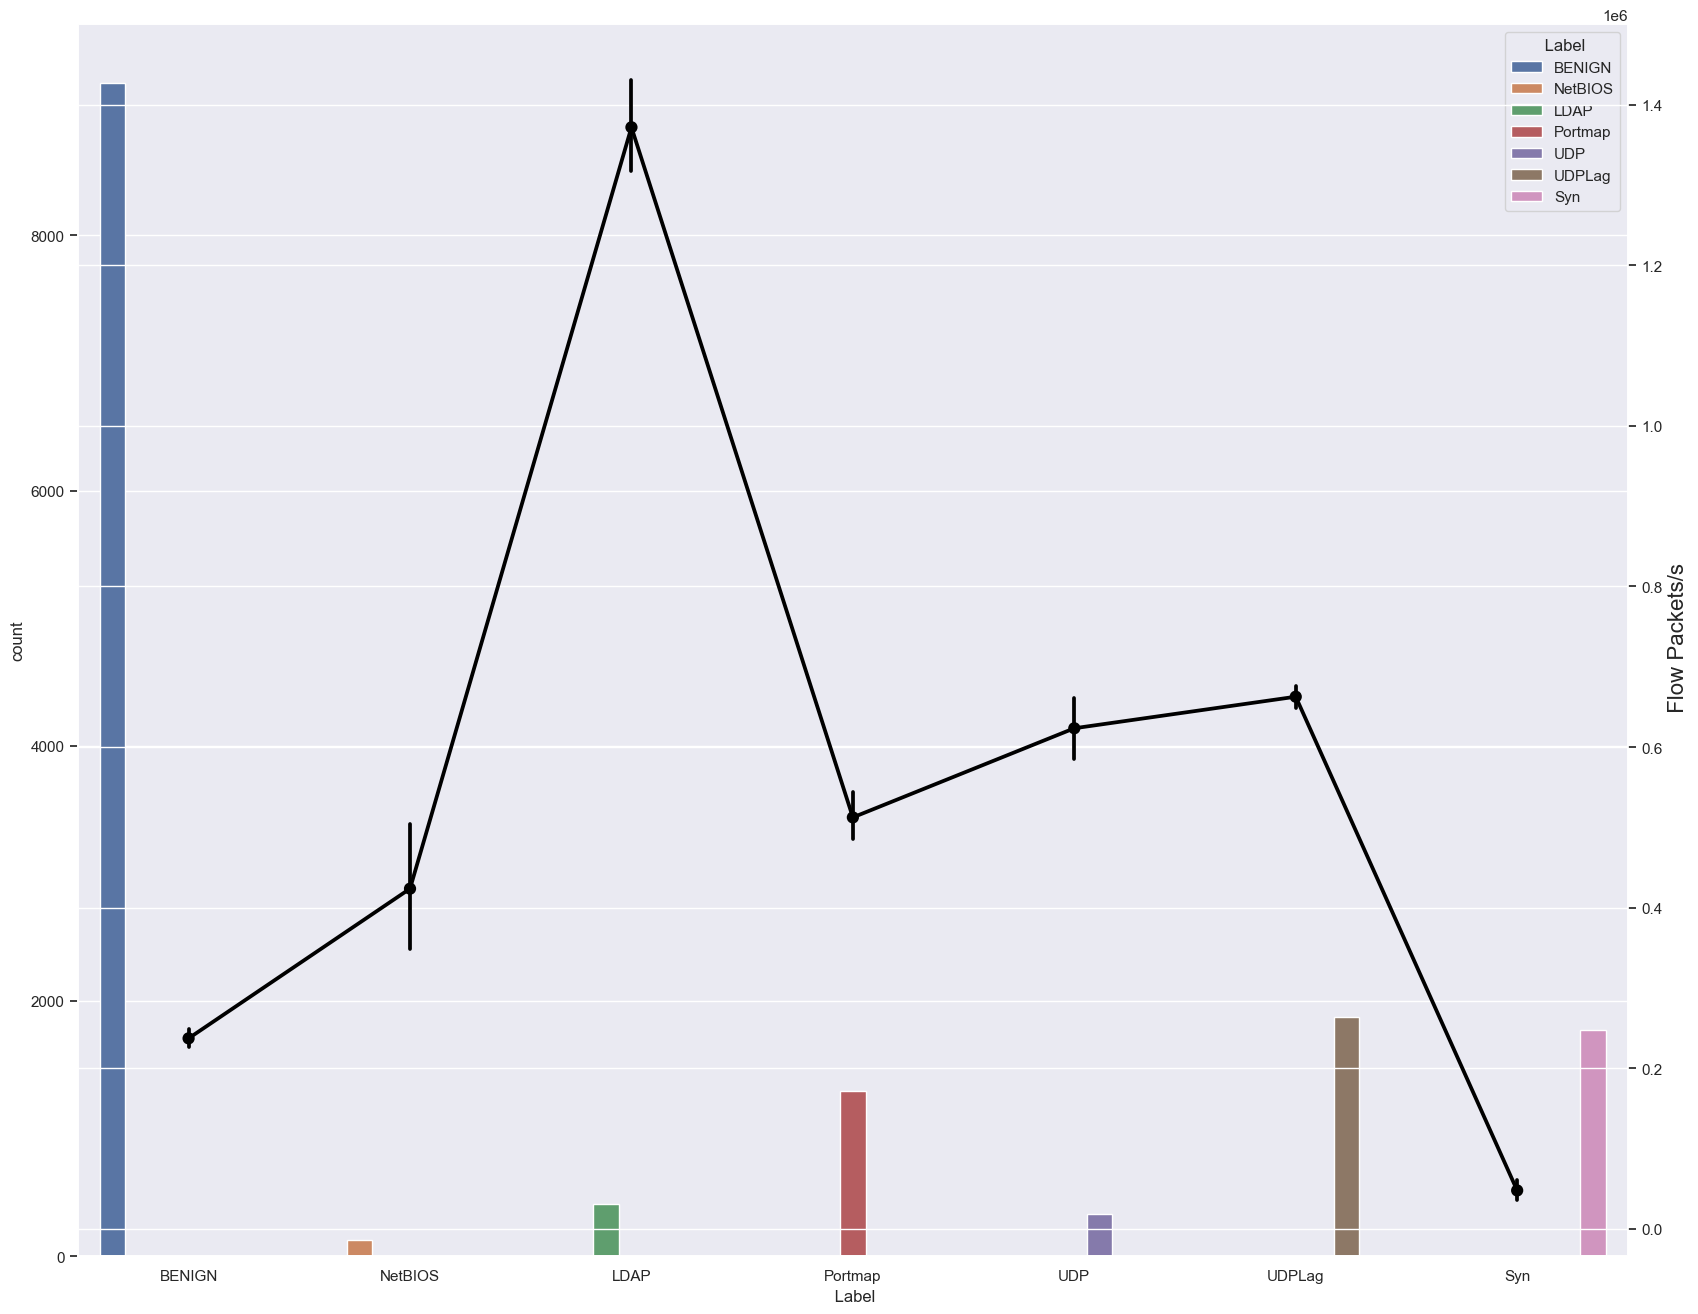

In [13]:
plt.figure(figsize=(20,16))
sns.set(style="darkgrid")
g1 = sns.countplot(x=' Label', hue=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y=' Flow Packets/s', x=' Label', data=data_, color='black')
gt.set_ylabel(" Flow Packets/s", fontsize=16)

In [14]:
df = data_[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]

df = pd.DataFrame(data,columns=[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd'])
corrMatrix = df.corr()
print (corrMatrix)

                               Bwd Packets/s   Total Fwd Packets  \
 Bwd Packets/s                      1.000000           -0.002335   
 Total Fwd Packets                 -0.002335            1.000000   
Total Length of Fwd Packets        -0.018677            0.244058   
 Flow Duration                     -0.036880            0.041612   
 Total Length of Bwd Packets       -0.000194            0.743909   
 Total Backward Packets            -0.000914            0.745387   
 Protocol                          -0.062849           -0.035403   
 Inbound                            0.079972           -0.008445   
 Min Packet Length                 -0.035865           -0.016818   
 Fwd Packet Length Min             -0.031282           -0.016890   
 Packet Length Mean                -0.043899            0.027219   
 Fwd Packet Length Max             -0.039264            0.030065   
 Average Packet Size               -0.041933            0.013146   
 ACK Flag Count                    -0.032443    

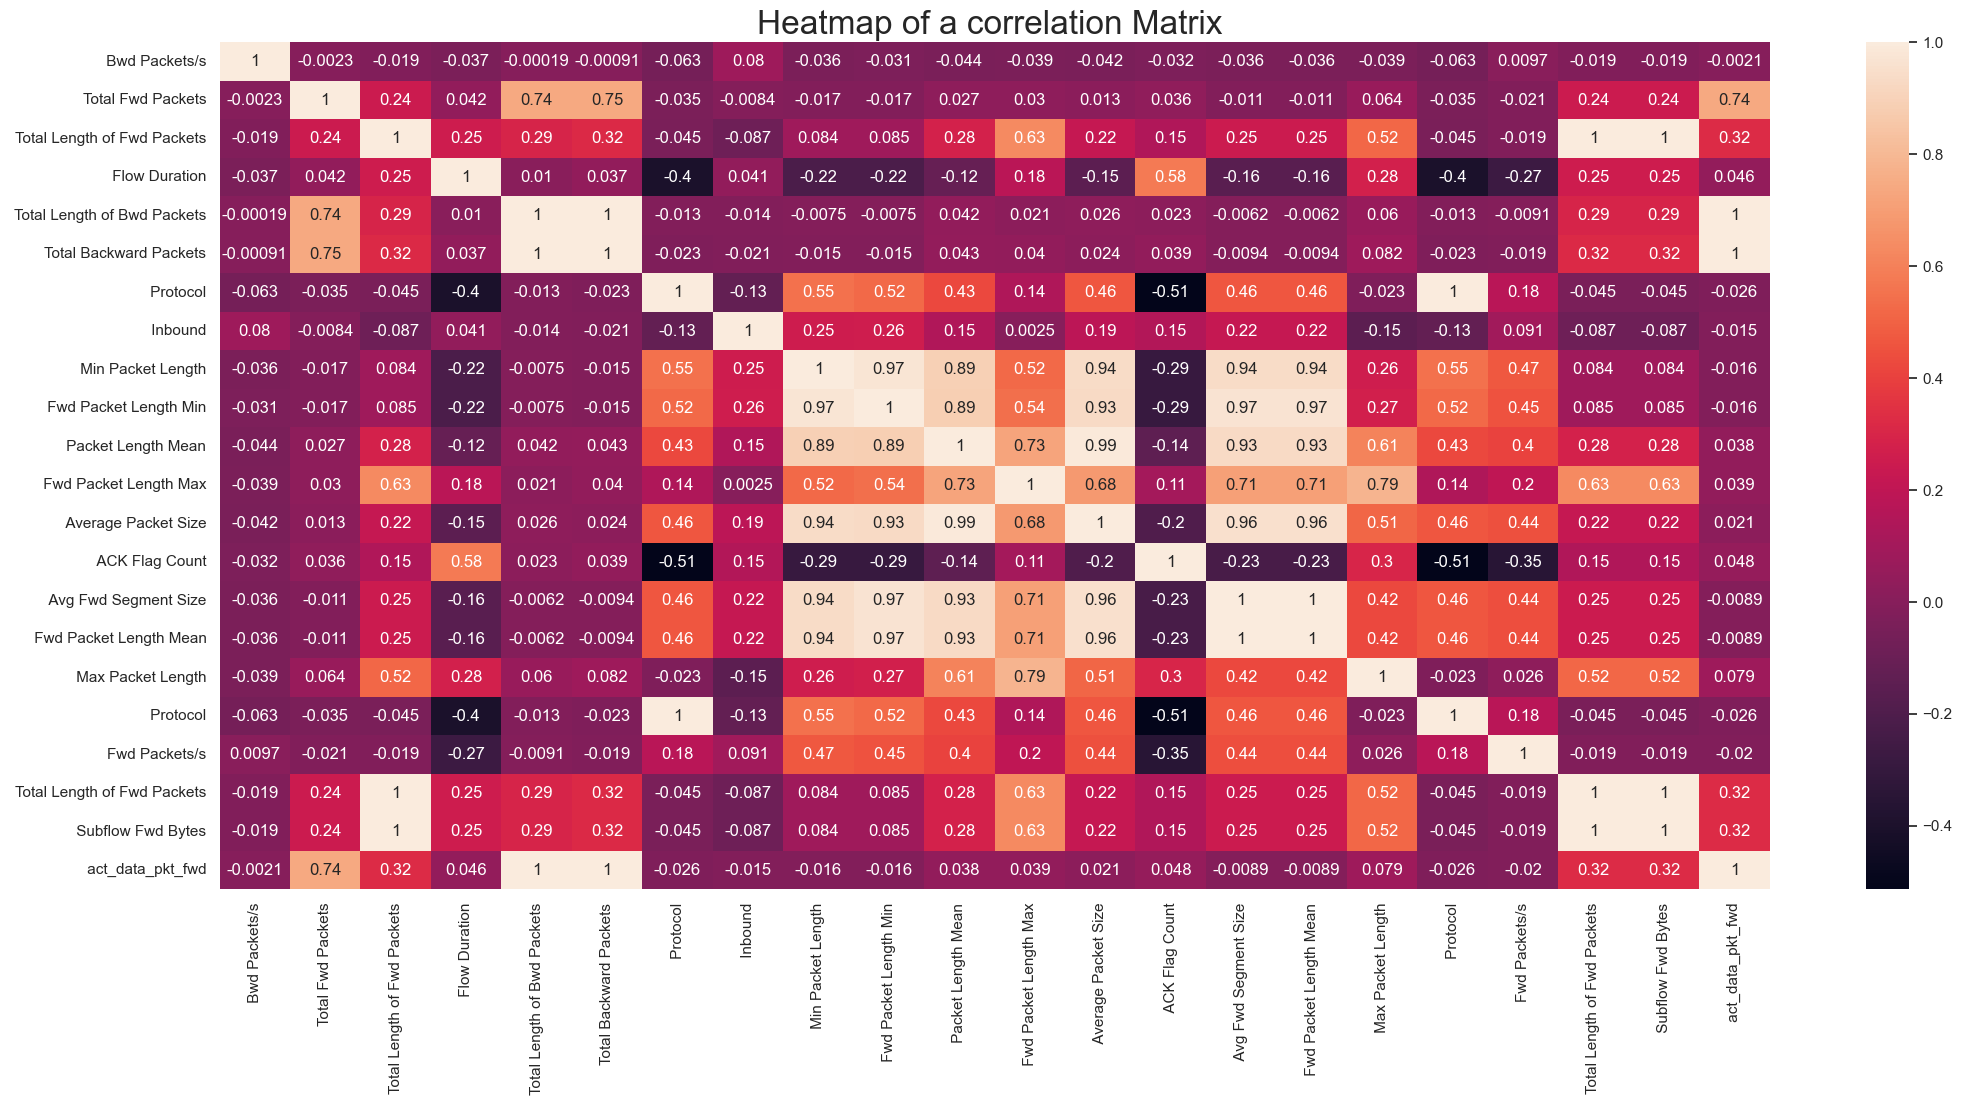

In [15]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize =(25,11)) 
plt.title('Heatmap of a correlation Matrix ', fontsize=24);


corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

plt.show()

Text(0, 0.5, 'Flow Bytes/s')

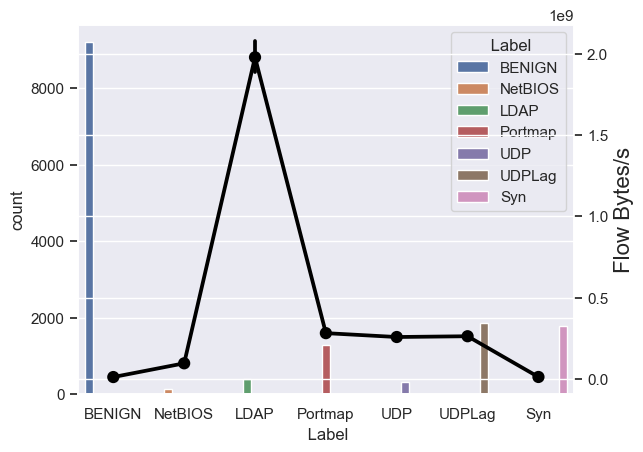

In [16]:
#plt.figure(figsize=(20,16))
sns.set(style="darkgrid")
g1 = sns.countplot(x=' Label', hue=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y='Flow Bytes/s', x=' Label', data=data_, color='black')
gt.set_ylabel("Flow Bytes/s", fontsize=16)

C:\Users\navee\AppData\Local\Temp\ipykernel_20468\3981935088.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(result[' Label'],result[' Total Fwd Packets'], use_line_collection = True)


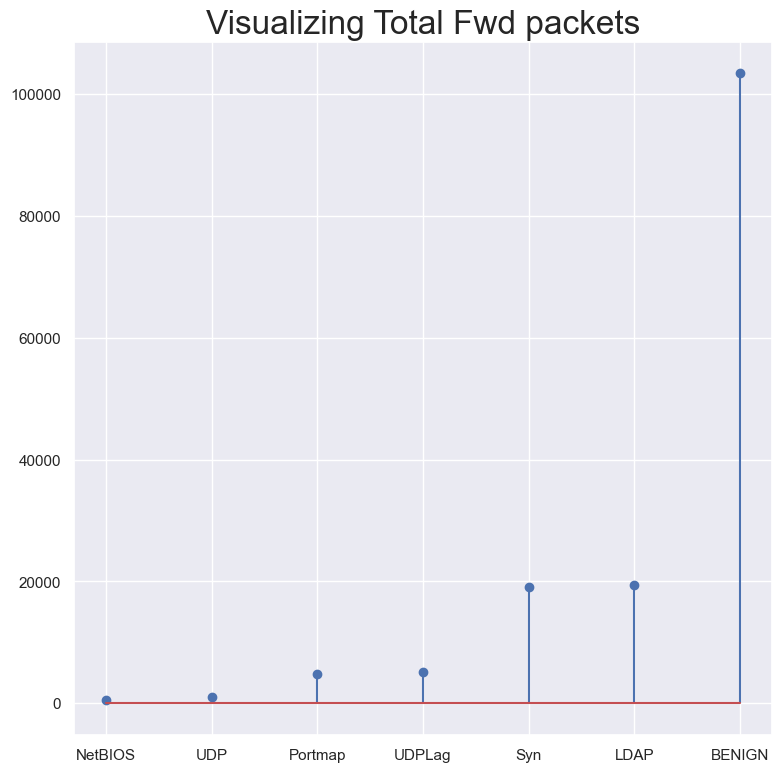

In [17]:
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="darkgrid")
plt.figure(figsize=(9,9))
result = data_.groupby([" Label"])[' Total Fwd Packets'].sum().reset_index().sort_values(' Total Fwd Packets')
plt.stem(result[' Label'],result[' Total Fwd Packets'], use_line_collection = True)

plt.title('Visualizing Total Fwd packets', fontsize=24);
plt.show()

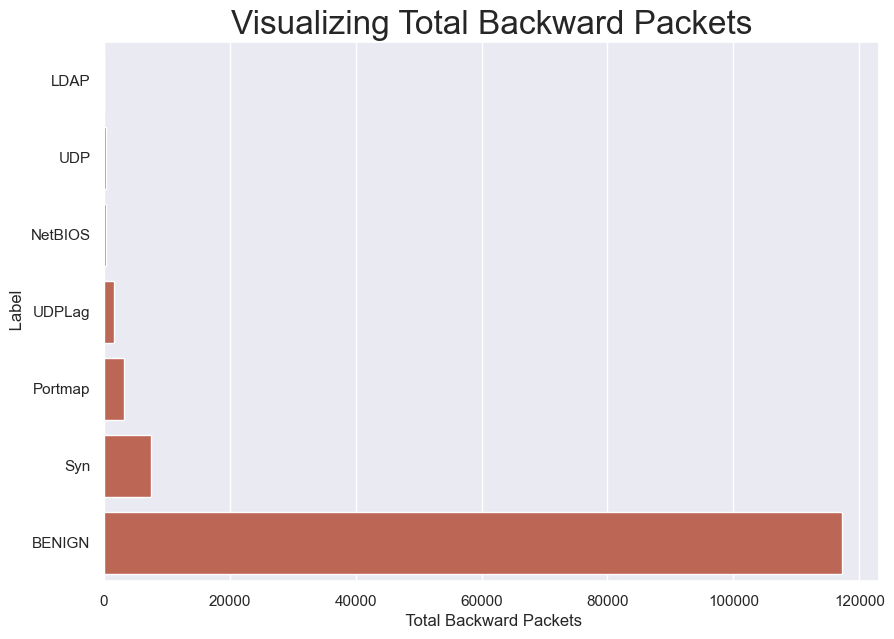

In [18]:
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
df1=data_[[' Label',' Total Backward Packets']]
result1 = df1.groupby([" Label"])[' Total Backward Packets'].sum().reset_index().sort_values(' Total Backward Packets')
plt.title('Visualizing Total Backward Packets', fontsize=24);

sns.barplot(
    x=" Total Backward Packets", 
    y=" Label",  
    data=result1,
    estimator=sum,
    errorbar=None,
    color='#CD5B45');

Text(0, 0.5, ' Protocol')

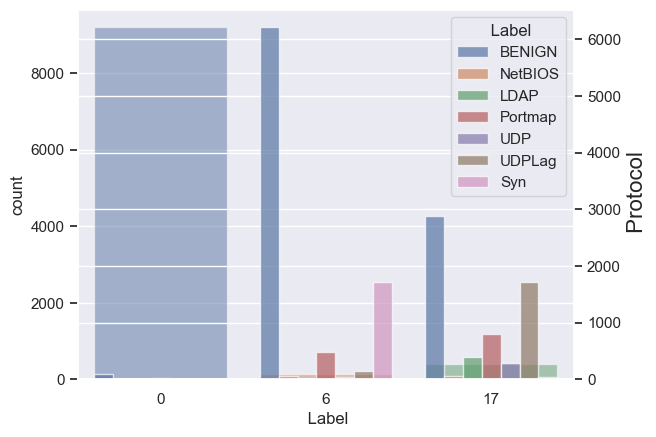

In [20]:
#plt.figure(figsize=(20,16))
g1 = sns.countplot(x=' Label', data=data_,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Protocol', hue=' Label',alpha=0.7, data=data_)
gt.set_ylabel(" Protocol", fontsize=16)

Text(0, 0.5, ' Inbound')

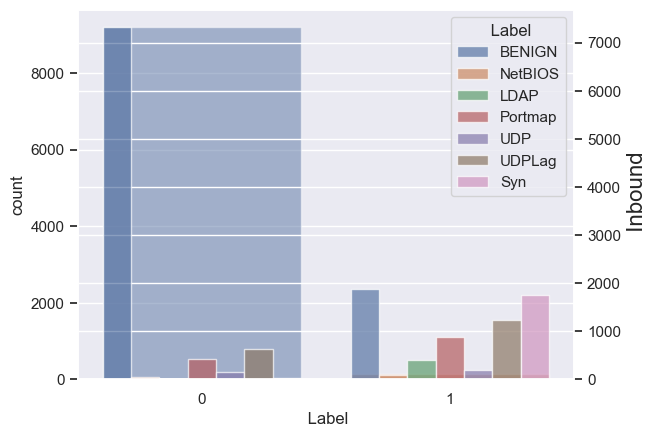

In [21]:
#plt.figure(figsize=(20,16))
g1 = sns.countplot(x=' Label', data=data_,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Inbound', hue=' Label',alpha=0.7, data=data_)
gt.set_ylabel(' Inbound', fontsize=16)

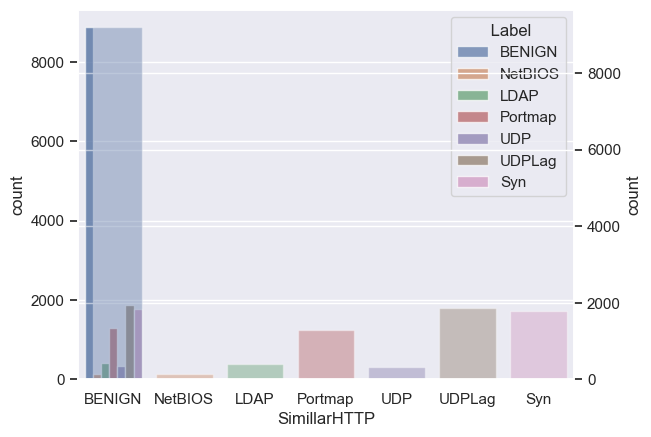

In [22]:
#plt.figure(figsize=(20,16))
g1 = sns.countplot(x='SimillarHTTP', hue=' Label',alpha=0.7, data=data_)
gt = g1.twinx()
gt = sns.countplot(x=' Label', data=data_,alpha=0.4)

## Unsupervised Approach for Detection of Threat

In [23]:

df2 = data_[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]
df2.dtypes

 Bwd Packets/s                  float64
 Total Fwd Packets                int64
Total Length of Fwd Packets       int64
 Flow Duration                    int64
 Total Length of Bwd Packets      int64
 Total Backward Packets           int64
 Protocol                         int64
 Inbound                          int64
 Min Packet Length                int64
 Fwd Packet Length Min            int64
 Packet Length Mean             float64
 Fwd Packet Length Max            int64
 Average Packet Size            float64
 ACK Flag Count                   int64
 Avg Fwd Segment Size           float64
 Fwd Packet Length Mean         float64
 Max Packet Length                int64
 Protocol                         int64
Fwd Packets/s                   float64
Total Length of Fwd Packets       int64
 Subflow Fwd Bytes                int64
 act_data_pkt_fwd                 int64
dtype: object

In [24]:
scale = preprocessing.StandardScaler()
X = scale.fit_transform(df2)
X_norm = preprocessing.normalize(X)

C:\Users\navee\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


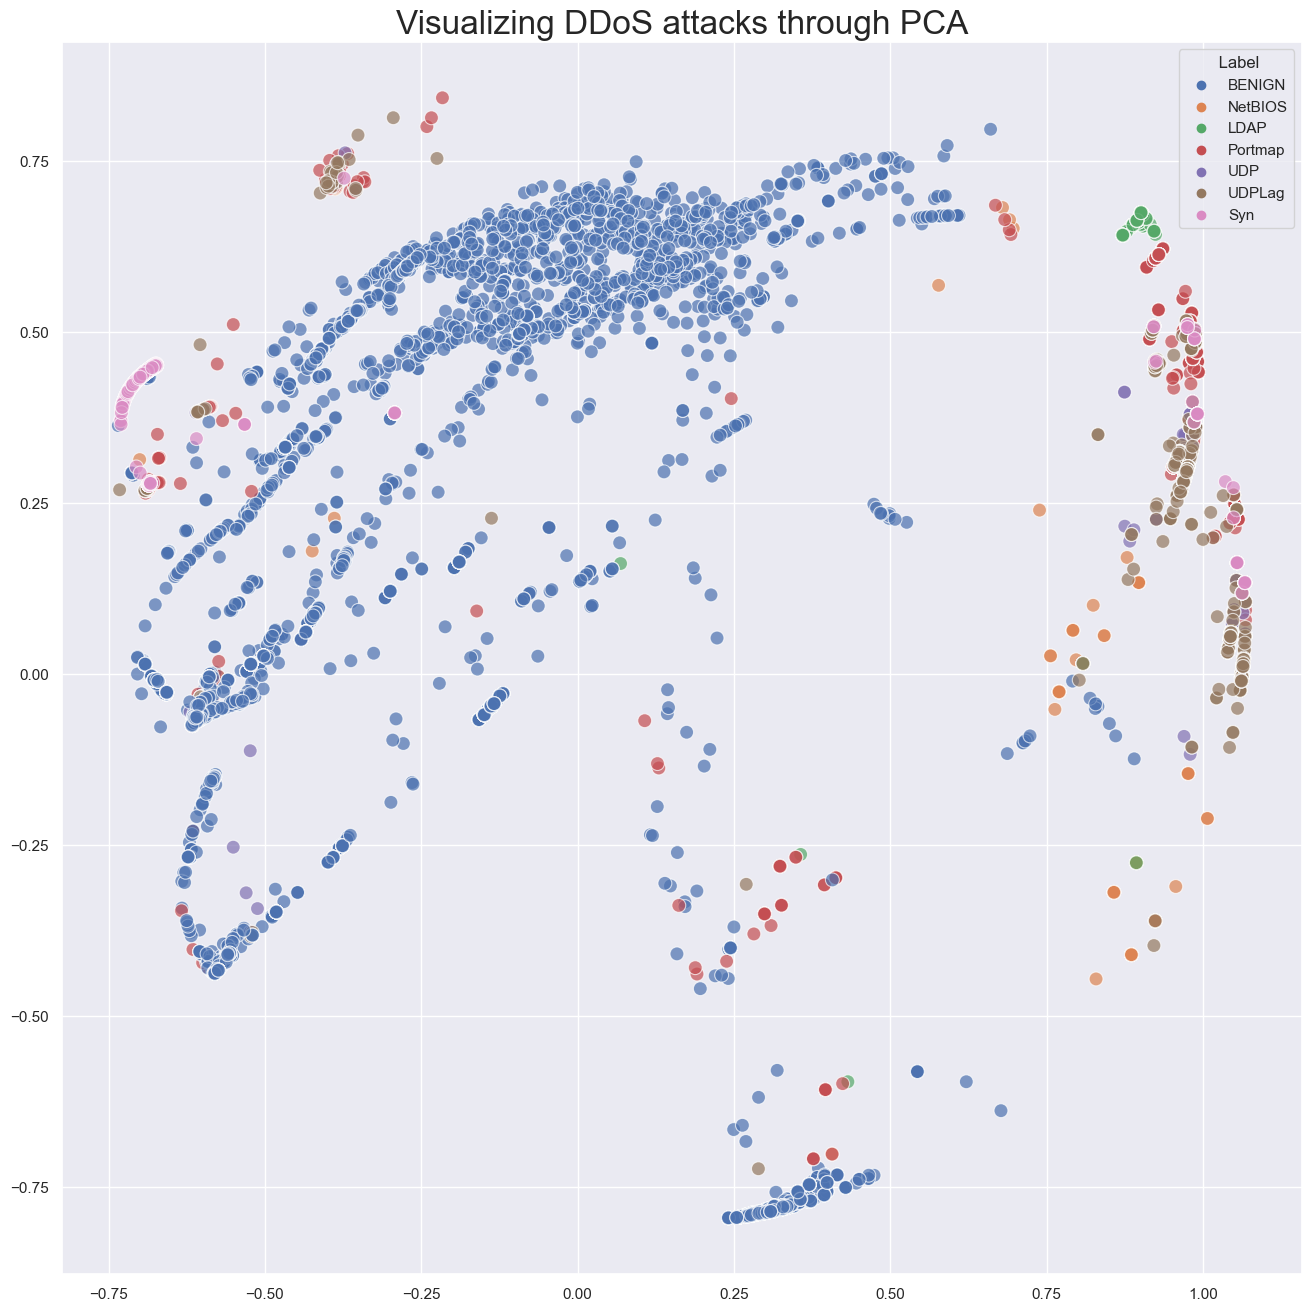

In [25]:
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X_norm)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], s=100, hue=data_[' Label'], cmap='Spectral', alpha=0.7)
plt.title('Visualizing DDoS attacks through PCA', fontsize=24);

C:\Users\navee\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


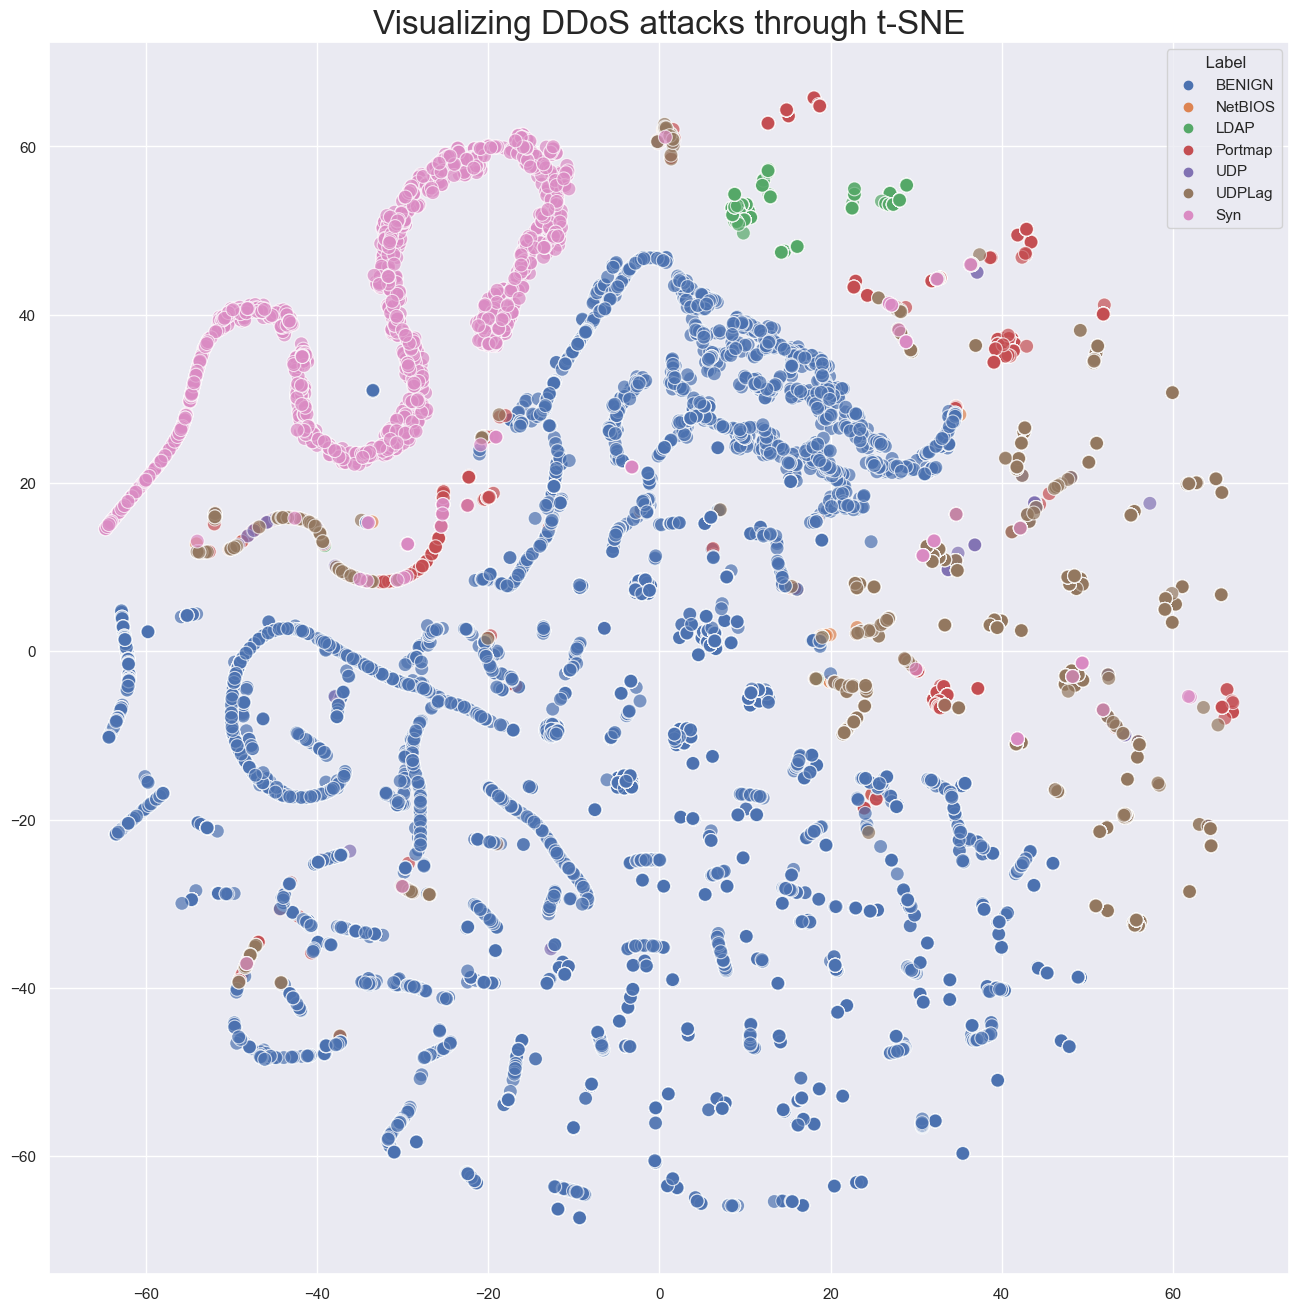

In [26]:
pca_ = PCA(n_components=2) 
principalComponents = pca_.fit_transform(X_norm)
tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=600).fit_transform(principalComponents)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(x=tsne_[:, 0], y=tsne_[:, 1], s=100, hue=data_[' Label'], cmap='Spectral', alpha=0.7)
plt.title('Visualizing DDoS attacks through t-SNE', fontsize=24);

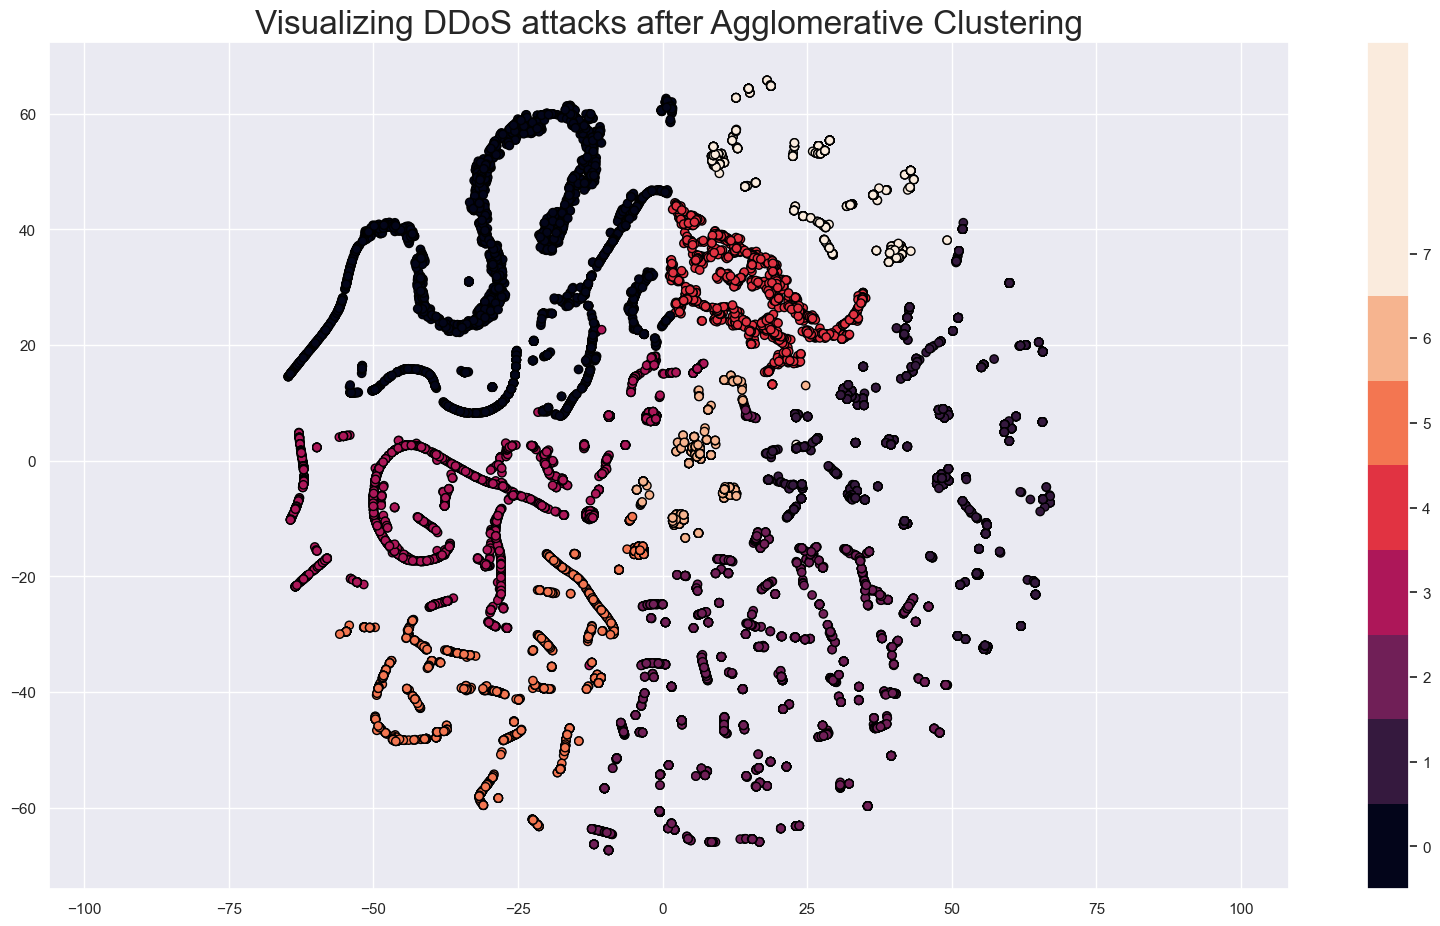

In [27]:
Agglo = AgglomerativeClustering(n_clusters=8)
Agglo.fit(principalComponents)
plt.figure(figsize=(20,11))
plt.scatter(tsne_[:, 0],tsne_[:, 1], c=Agglo.labels_,edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(8))
plt.title('Visualizing DDoS attacks after Agglomerative Clustering', fontsize=24);
plt.show()

## Supervised Approach for Detection of Threat

In [28]:
data_X = data_.drop([' Label','SimillarHTTP'], axis = 1)

In [29]:
data_X.shape 

(14998, 35)

In [30]:
data_y = data_[' Label']

In [31]:
data_y.shape 

(14998,)

In [32]:
#Encoding Label
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data_y_trans = le.fit_transform(data_y)

In [33]:
data_y_trans

array([0, 0, 0, ..., 4, 4, 4])

In [34]:
#data_X

In [35]:
le_fid = LabelEncoder()
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [36]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])



### Feature Selection 

In [37]:
 
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [38]:
model.feature_importances_

array([0.01615847, 0.00288346, 0.00754073, 0.00480364, 0.00439745,
       0.00589336, 0.00184655, 0.00684927, 0.00789361, 0.01118142,
       0.04088121, 0.00178303, 0.00239465, 0.02717739, 0.08269893,
       0.1127396 , 0.03330022, 0.06753121, 0.05341615, 0.11693218,
       0.02388207, 0.02439073, 0.03553393, 0.06223284, 0.03734076,
       0.03822838, 0.02284289, 0.02257587, 0.02266914, 0.01742647,
       0.01317068, 0.0145451 , 0.00920886, 0.0369491 , 0.01070065])

<Axes: title={'center': 'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

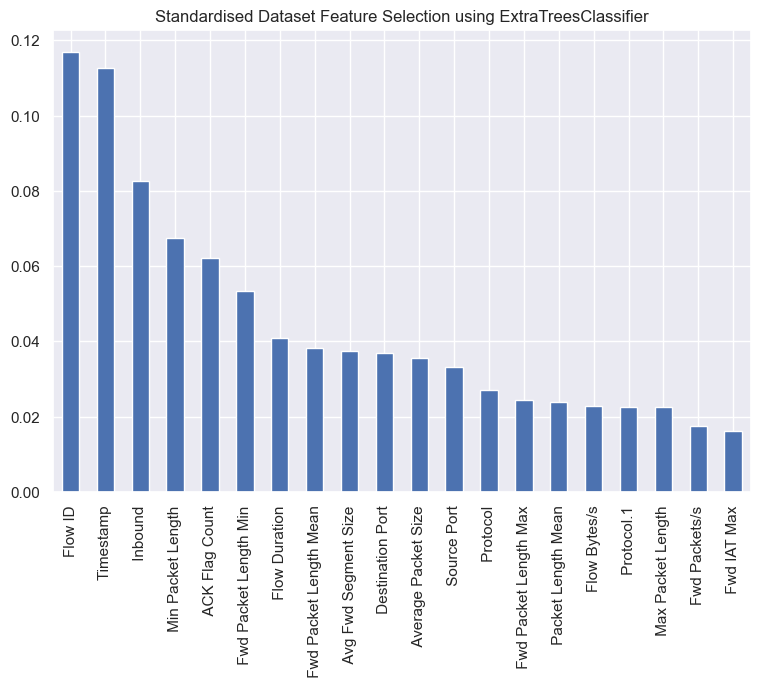

In [39]:
plt.figure(figsize=(9,6))
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [40]:
data_new_20features_X = data_X[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]

### Train Test Split Normal dataset ( All features)





In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [42]:
X_train.shape 

(10498, 35)

In [43]:
X_test.shape 

(4500, 35)

In [44]:
X_train.describe

<bound method NDFrame.describe of         Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean   Bwd IAT Std  \
5898              1             1              1          1.000          0.00   
13111             3             3              0          0.000          0.00   
1574       10244029             2       51199854    4654532.000    5347648.00   
12995             3             3              0          0.000          0.00   
881         5157165             2          85780      12254.286      23885.16   
...             ...           ...            ...            ...           ...   
5193            120             3              0          0.000          0.00   
13420      21153707             1       42943155    6134736.500   10706940.00   
5392              2             2              0          0.000          0.00   
862        10046417             2      110391213    3806593.500    4935812.00   
7272              0             0              2          2.000          0.

Standarization

In [45]:

from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

### Train Test Split 20 Feature Dataset 

In [46]:
### Train Test Split 20 Feature Dataset 

from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)


**feature Scaling : Standardization of the 20 Feature Dataset **

In [47]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

### 1. Decision Tree  Classification 

In [48]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(X_train_std_20, y_train_20)


DecisionTreeClassifier()

In [49]:
dt_y_pred = dt.predict(X_test_std_20)

In [50]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print("Classification Report for Decision Tree: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(dt_y_pred)))

Classification Report for Decision Tree: 
               precision    recall  f1-score   support

      BENIGN       0.93      0.89      0.91      2763
        LDAP       0.99      0.95      0.97       115
     NetBIOS       0.96      0.52      0.68        44
     Portmap       0.82      0.60      0.69       369
         Syn       0.97      0.94      0.95       516
         UDP       0.07      0.44      0.12       110
      UDPLag       0.70      0.26      0.38       583

    accuracy                           0.78      4500
   macro avg       0.78      0.66      0.67      4500
weighted avg       0.87      0.78      0.81      4500



In [51]:
dt_conf_mat = confusion_matrix(y_test_20, dt_y_pred)
print("Decision Tree Confusion: \n", dt_conf_mat)

Decision Tree Confusion: 
 [[2465    1    0   25    0  272    0]
 [   2  109    0    4    0    0    0]
 [  15    0   23    0    1    3    2]
 [ 123    0    0  221    7   12    6]
 [  18    0    0    2  486    0   10]
 [  13    0    0    2    1   48   46]
 [  24    0    1   17    7  383  151]]


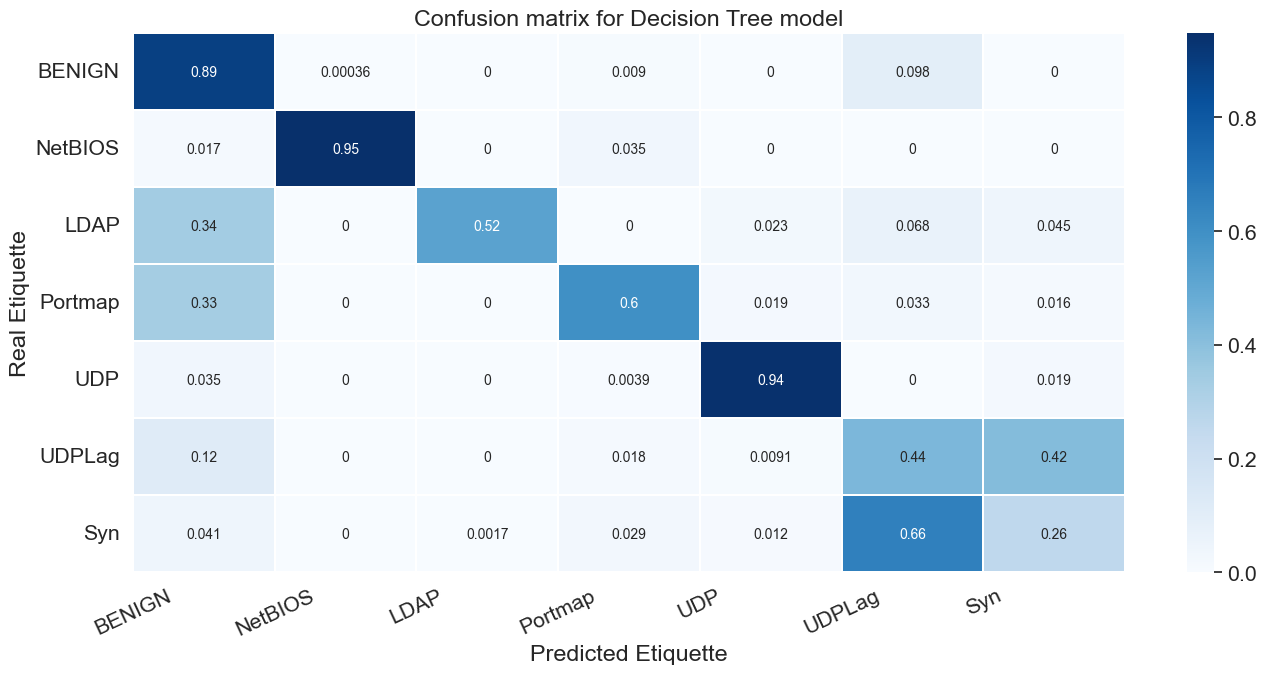

In [52]:
matrix = dt_conf_mat.astype('float') / dt_conf_mat.sum(axis=1)[:, np.newaxis] 
plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Blues, linewidths=0.2) 

class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 
plt.xlabel('Predicted Etiquette') 
plt.ylabel('Real Etiquette') 
plt.title('Confusion matrix for Decision Tree model') 
plt.show()

In [53]:
#RoC curve Function 

def RoC_Curve(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        Note: Some part of this Method code is taken 
            from Sklearn Website
        """

        lw = 2
        n_classes = 7
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        #plt.legend(loc="lower right")
        #plt.show()

C:\Users\navee\AppData\Local\Temp\ipykernel_20468\1507532104.py:42: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


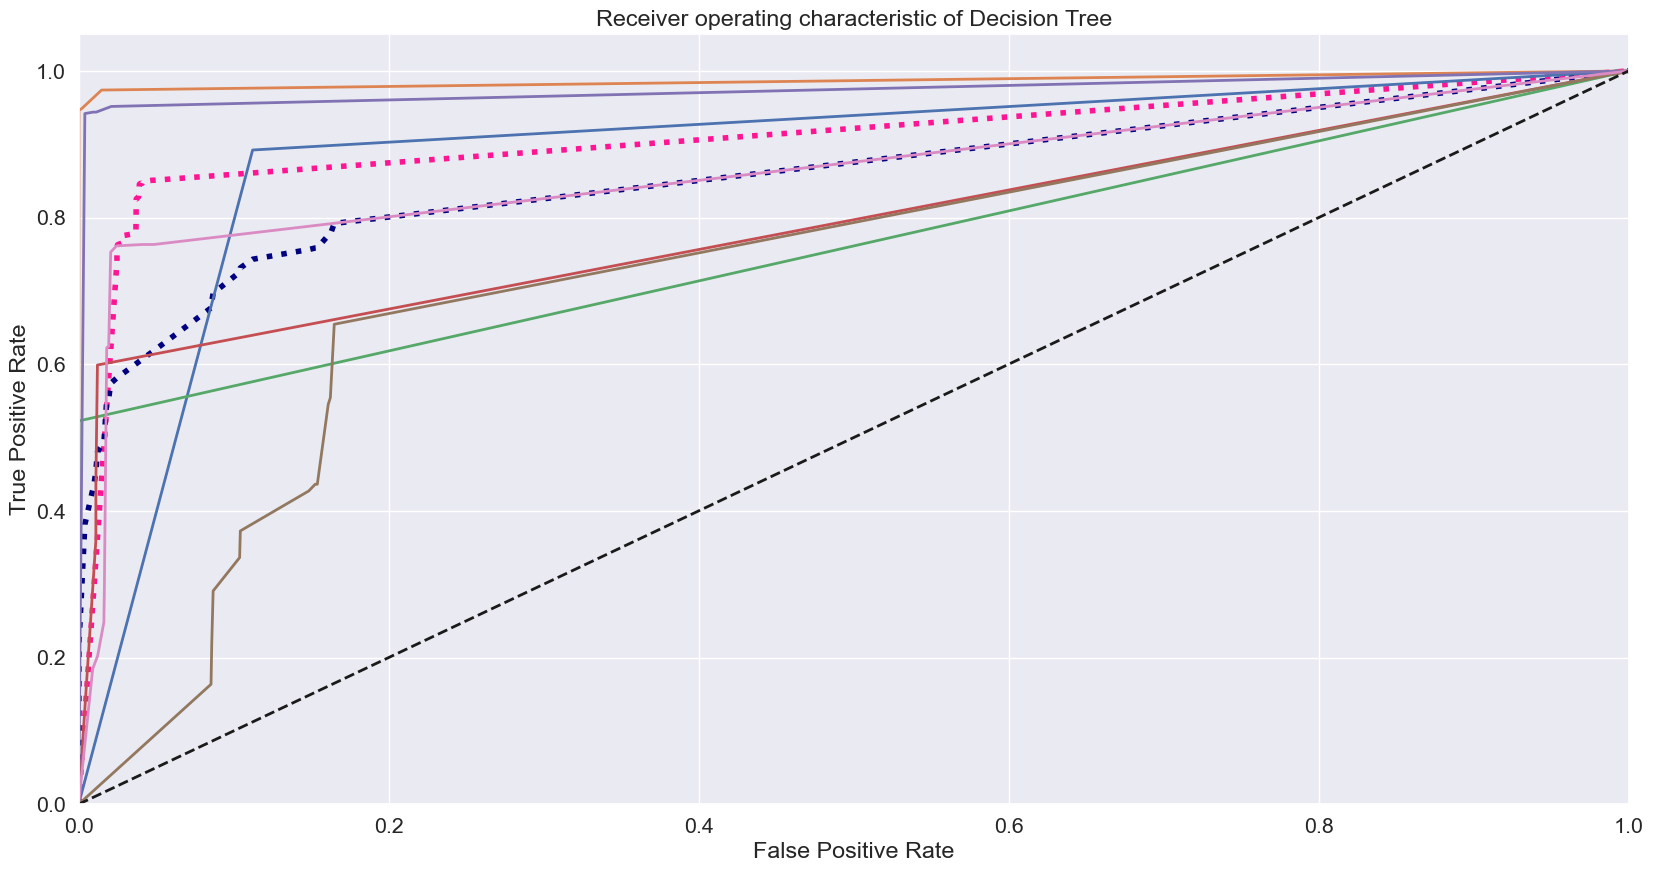

In [54]:
# RoC Curve 
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
title = 'Receiver operating characteristic of Decision Tree'
RoC_Curve(dt, X_test_std_20, y_test_20, title)

In [55]:
acc_score_dt = accuracy_score(y_test_20, dt_y_pred)
print("Accuracy Score for Decision Tree: \n", acc_score_dt*100)

Accuracy Score for Decision Tree: 
 77.84444444444445


### 2. Naive Bayes Classification 

In [56]:
from sklearn.naive_bayes import GaussianNB 

In [57]:
gnb = GaussianNB()
gnb.fit(X_train_std_20, y_train_20)
gnb_y_pred = gnb.predict(X_test_std_20)

In [58]:
print("Classification Report for Naive Bayes: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(gnb_y_pred)))

Classification Report for Naive Bayes: 
               precision    recall  f1-score   support

      BENIGN       0.78      0.98      0.87      2763
        LDAP       0.00      0.00      0.00       115
     NetBIOS       0.00      0.00      0.00        44
     Portmap       0.18      0.09      0.12       369
         Syn       1.00      0.02      0.04       516
         UDP       0.00      0.00      0.00       110
      UDPLag       0.00      0.00      0.00       583

    accuracy                           0.61      4500
   macro avg       0.28      0.16      0.15      4500
weighted avg       0.61      0.61      0.55      4500



C:\Users\navee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\navee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [59]:
gnb_conf_mat = confusion_matrix(y_test_20, gnb_y_pred)
print("Naive Bayes Confusion Matrix: \n", gnb_conf_mat)

Naive Bayes Confusion Matrix: 
 [[2709    0   43   11    0    0    0]
 [   2    0    4  109    0    0    0]
 [  44    0    0    0    0    0    0]
 [ 153    0  184   32    0    0    0]
 [ 494    0    9    3   10    0    0]
 [  21    0   88    0    0    0    1]
 [  46    0  519   18    0    0    0]]


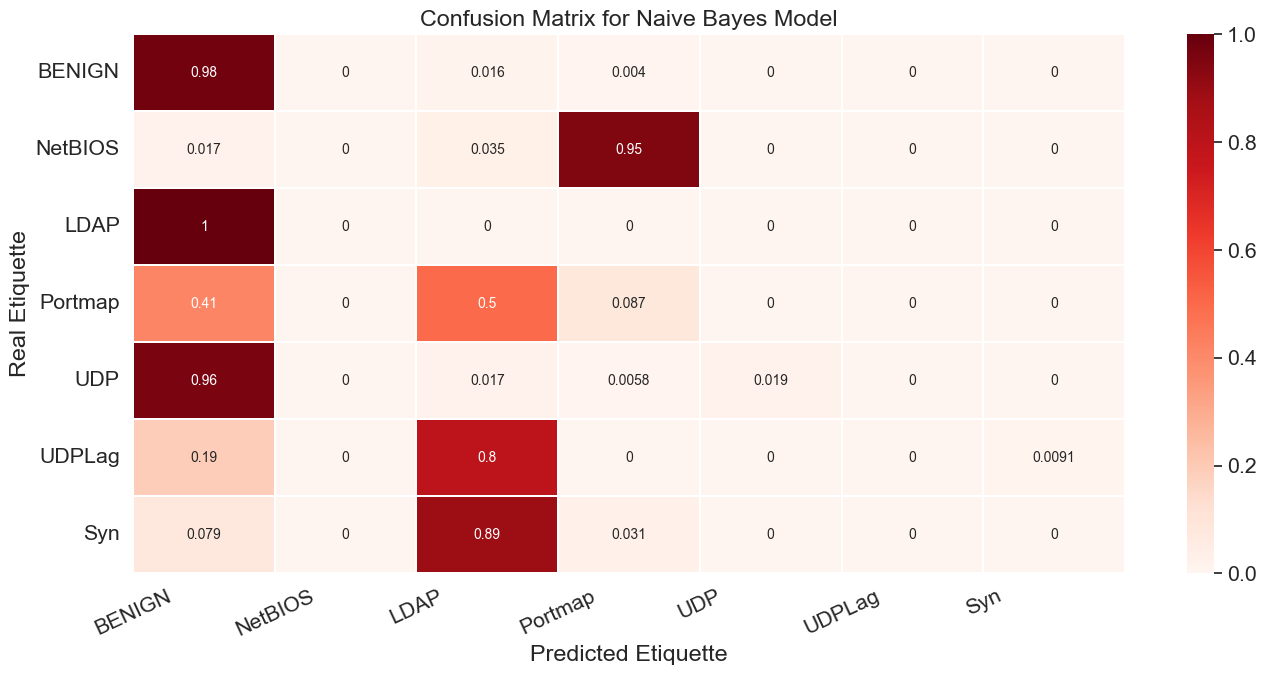

In [60]:
matrix = gnb_conf_mat.astype('float') / gnb_conf_mat.sum(axis=1)[:, np.newaxis] 

plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Reds, linewidths=0.2) 

class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 
plt.xlabel('Predicted Etiquette') 
plt.ylabel('Real Etiquette') 
plt.title('Confusion Matrix for Naive Bayes Model') 
plt.show()

C:\Users\navee\AppData\Local\Temp\ipykernel_20468\1507532104.py:42: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


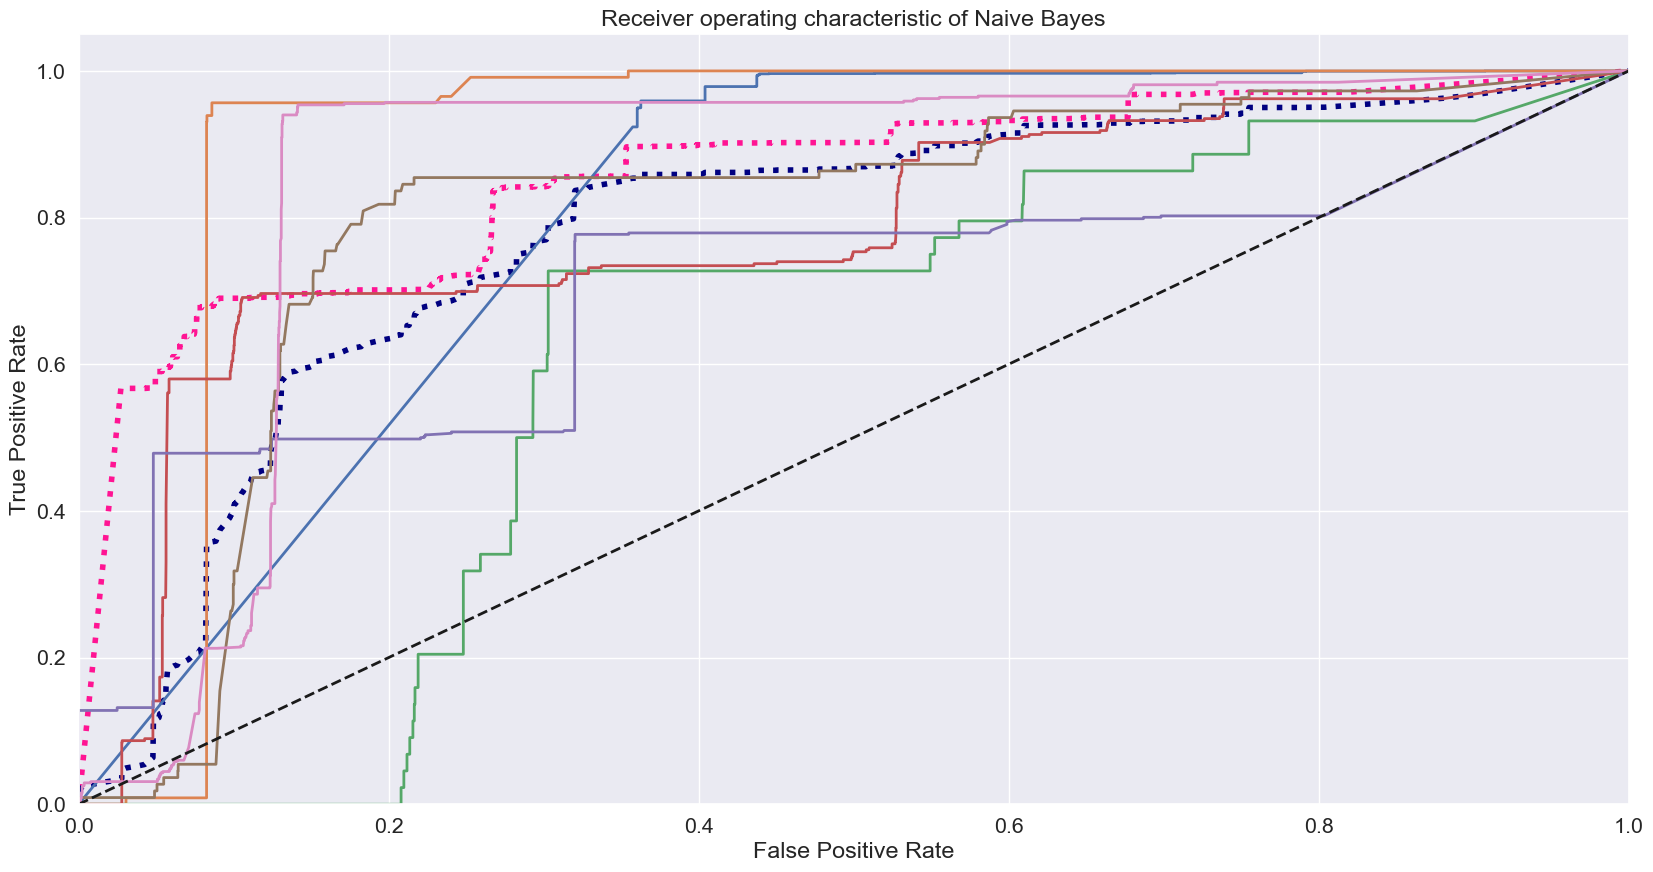

In [61]:
# RoC Curve 
title = 'Receiver operating characteristic of Naive Bayes'
RoC_Curve(gnb, X_test_std_20, y_test_20, title)

In [62]:
acc_score_gnb = accuracy_score(y_test_20, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_gnb*100)

Accuracy Score for Naive: 
 61.133333333333326


### 3. Random Forest Classification 

In [63]:
### 1. Random Forest Classification 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)
rf_y_pred = rf.predict(X_test_std_20)

In [64]:
rf_y_pred

array([4, 0, 0, ..., 0, 0, 0])

In [65]:
#Rapport ( Random forest)

print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

      BENIGN       0.92      1.00      0.96      2763
        LDAP       1.00      0.95      0.97       115
     NetBIOS       0.92      0.52      0.67        44
     Portmap       0.94      0.64      0.76       369
         Syn       1.00      0.92      0.96       516
         UDP       0.18      0.31      0.23       110
      UDPLag       0.85      0.66      0.74       583

    accuracy                           0.89      4500
   macro avg       0.83      0.71      0.76      4500
weighted avg       0.91      0.89      0.89      4500



In [66]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[2763    0    0    0    0    0    0]
 [   2  109    0    4    0    0    0]
 [  20    0   23    1    0    0    0]
 [ 130    0    1  237    0    1    0]
 [  26    0    0    2  476    0   12]
 [  19    0    0    2    0   34   55]
 [  40    0    1    5    0  152  385]]


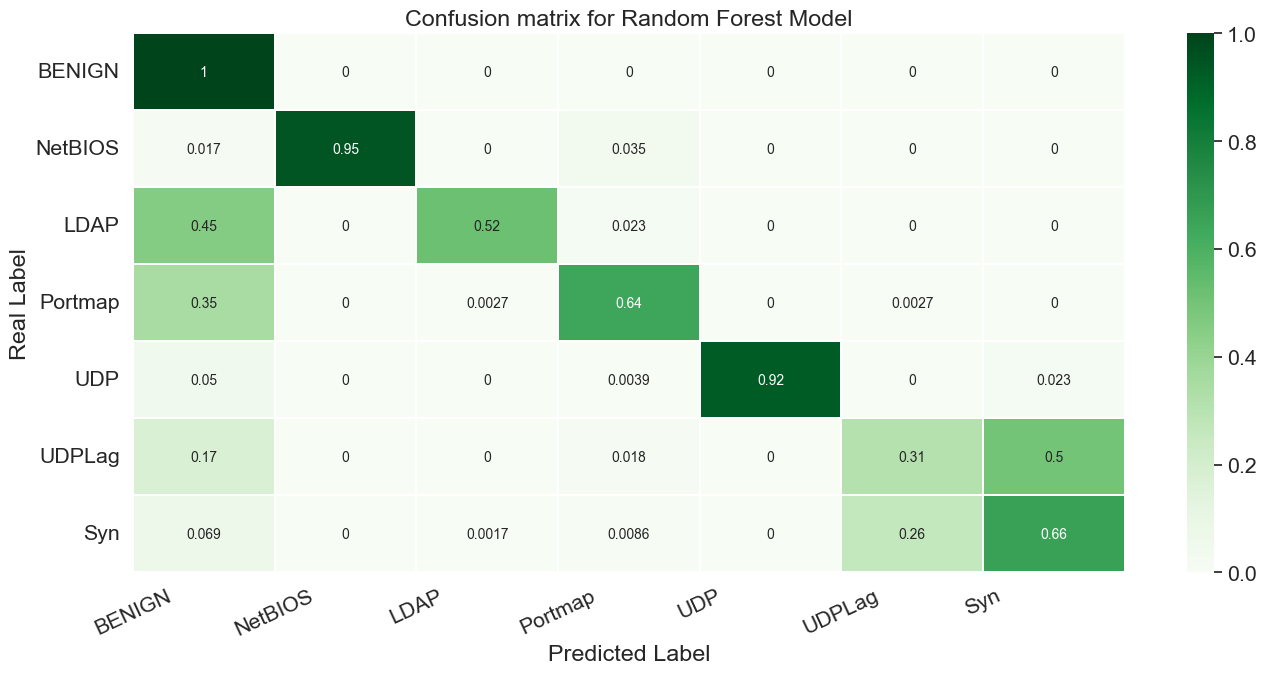

In [67]:
matrix = rf_conf_mat.astype('float') / rf_conf_mat.sum(axis=1)[:, np.newaxis] 

plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Greens, linewidths=0.2) 

class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 
plt.xlabel('Predicted Label') 
plt.ylabel('Real Label') 
plt.title('Confusion matrix for Random Forest Model') 
plt.show()

C:\Users\navee\AppData\Local\Temp\ipykernel_20468\1507532104.py:42: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


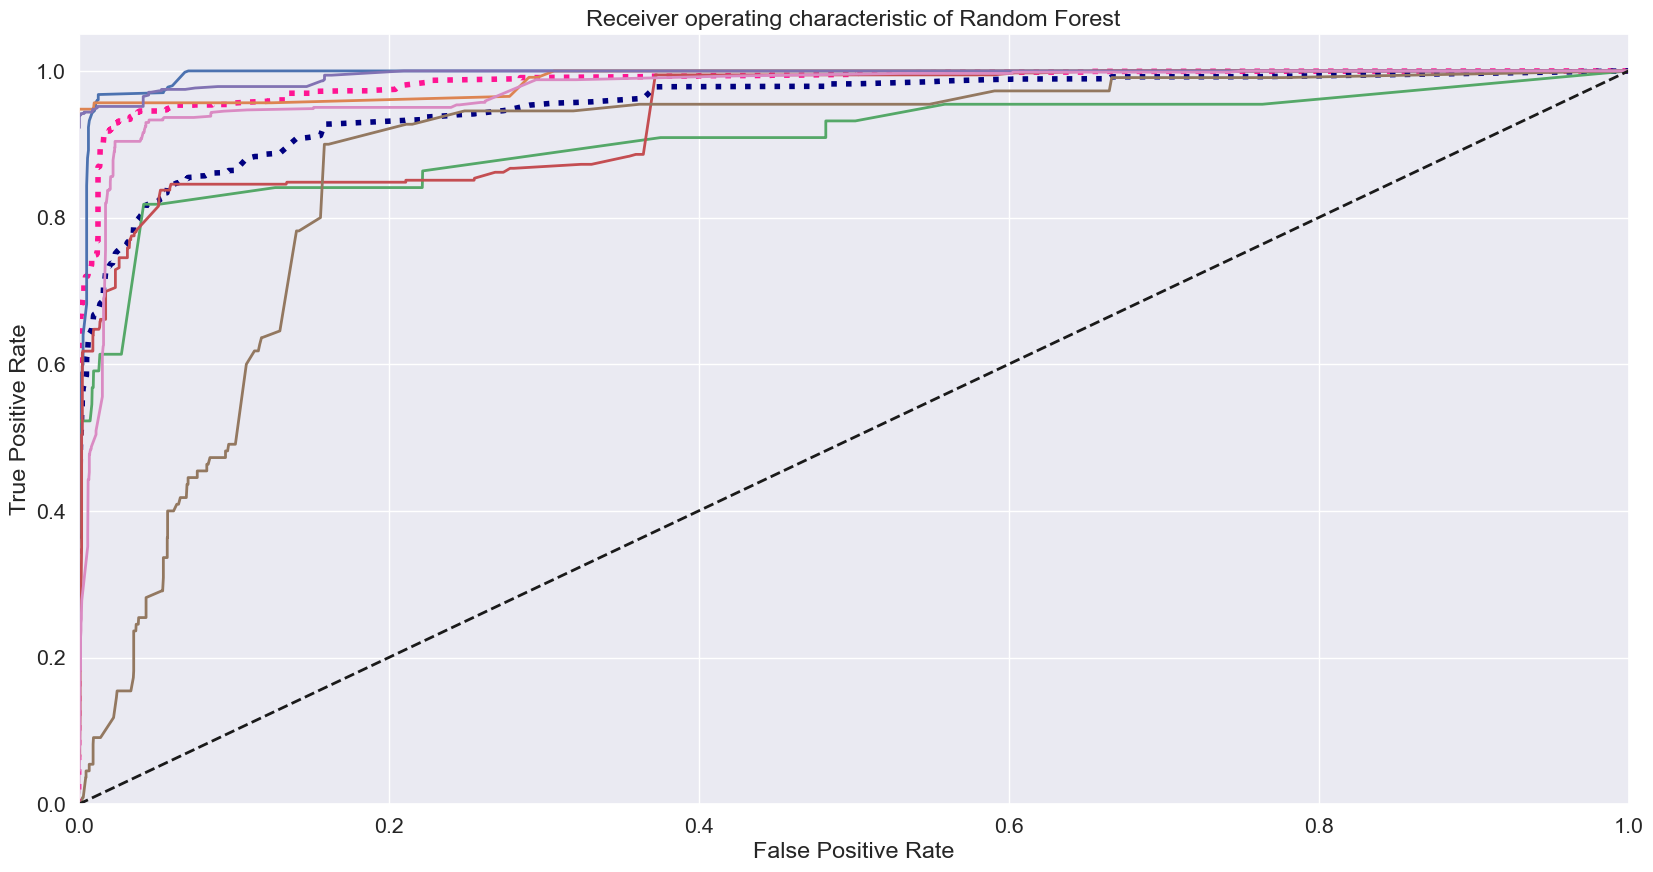

In [68]:

title = 'Receiver operating characteristic of Random Forest'
RoC_Curve(rf, X_test_std_20, y_test_20, title)

In [69]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 89.48888888888888


### Random Forest / Decision Tree / Naive Bayes


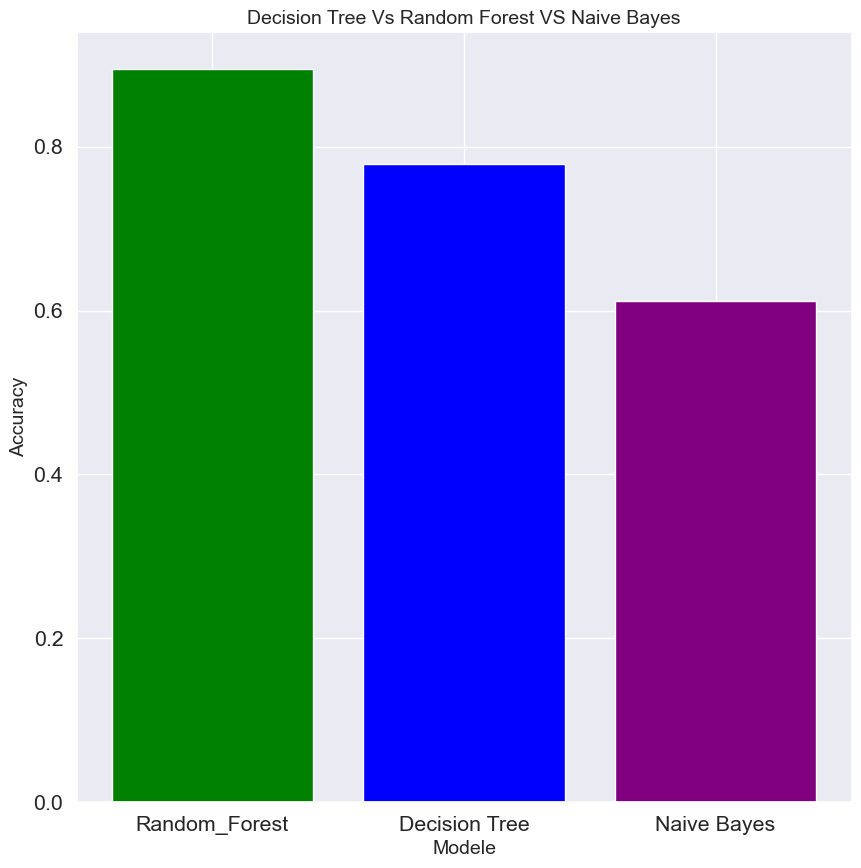

In [70]:
import matplotlib.pyplot as plt
   
Country = ['Random_Forest','Decision Tree','Naive Bayes']
GDP_Per_Capita = [acc_score,acc_score_dt,acc_score_gnb]
plt.figure(figsize=(10,10))
New_Colors = ['green','blue','purple']
plt.bar(Country, GDP_Per_Capita, color=New_Colors)
plt.title('Decision Tree Vs Random Forest VS Naive Bayes', fontsize=14)
plt.xlabel('Modele', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

## Gradient Boosting Classifier

In [71]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train_std_20, y_train_20)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [72]:
y_train_gbc = gbc.predict(X_train_std_20)
y_test_gbc = gbc.predict(X_test_std_20)

In [73]:
#computing the accuracy, f1_score, Recall, precision of the model performance
from sklearn import metrics
acc_train_gbc = metrics.accuracy_score(y_train_20,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test_20,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train_20,y_train_gbc,average='weighted')
f1_score_test_gbc = metrics.f1_score(y_test_20,y_test_gbc,average='weighted')
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train_20,y_train_gbc,average='weighted')
recall_score_test_gbc =  metrics.recall_score(y_test_20,y_test_gbc,average='weighted')
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train_20,y_train_gbc,average='weighted')
precision_score_test_gbc = metrics.precision_score(y_test_20,y_test_gbc,average='weighted')
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.850
Gradient Boosting Classifier : Accuracy on test Data: 0.428

Gradient Boosting Classifier : f1_score on training Data: 0.844
Gradient Boosting Classifier : f1_score on test Data: 0.453

Gradient Boosting Classifier : Recall on training Data: 0.850
Gradient Boosting Classifier : Recall on test Data: 0.428

Gradient Boosting Classifier : precision on training Data: 0.852
Gradient Boosting Classifier : precision on test Data: 0.537


In [74]:

print(metrics.classification_report(y_test_20, y_test_gbc))

              precision    recall  f1-score   support

           0       0.67      0.42      0.51      2763
           1       0.07      0.13      0.09       115
           2       0.00      0.00      0.00        44
           3       0.16      0.61      0.25       369
           4       0.90      0.97      0.93       516
           5       0.04      0.08      0.06       110
           6       0.08      0.05      0.06       583

    accuracy                           0.43      4500
   macro avg       0.27      0.32      0.27      4500
weighted avg       0.54      0.43      0.45      4500



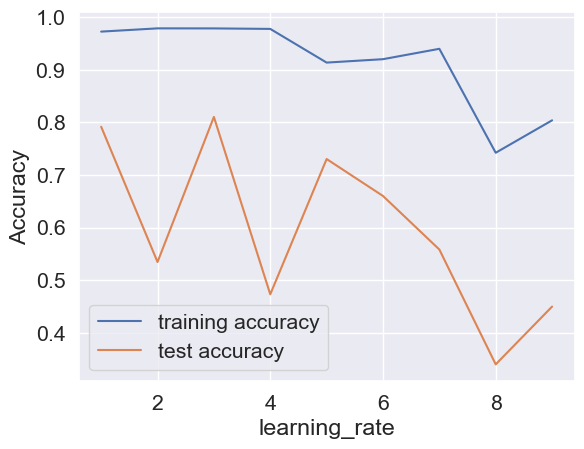

In [75]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train_std_20, y_train_20)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train_std_20, y_train_20))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test_std_20, y_test_20))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [76]:
gbc_acc_score = accuracy_score(y_test_20, y_test_gbc)
print("Accuracy Score for Gradient Boosting: \n", gbc_acc_score*100)

Accuracy Score for Gradient Boosting: 
 42.82222222222222


## Cat Boost Classifier

In [77]:
!pip install catboost


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train_std_20, y_train_20)

0:	learn: 1.4975056	total: 208ms	remaining: 3m 28s
1:	learn: 1.2554303	total: 246ms	remaining: 2m 2s
2:	learn: 1.0759255	total: 289ms	remaining: 1m 36s
3:	learn: 0.9432620	total: 333ms	remaining: 1m 22s
4:	learn: 0.8419039	total: 373ms	remaining: 1m 14s
5:	learn: 0.7602558	total: 413ms	remaining: 1m 8s
6:	learn: 0.6908850	total: 453ms	remaining: 1m 4s
7:	learn: 0.6337400	total: 496ms	remaining: 1m 1s
8:	learn: 0.5860048	total: 539ms	remaining: 59.3s
9:	learn: 0.5438225	total: 582ms	remaining: 57.6s
10:	learn: 0.5051861	total: 625ms	remaining: 56.2s
11:	learn: 0.4742574	total: 667ms	remaining: 54.9s
12:	learn: 0.4446148	total: 713ms	remaining: 54.1s
13:	learn: 0.4199616	total: 756ms	remaining: 53.2s
14:	learn: 0.3972351	total: 799ms	remaining: 52.5s
15:	learn: 0.3779903	total: 839ms	remaining: 51.6s
16:	learn: 0.3600869	total: 875ms	remaining: 50.6s
17:	learn: 0.3440409	total: 912ms	remaining: 49.8s
18:	learn: 0.3280057	total: 951ms	remaining: 49.1s
19:	learn: 0.3155189	total: 987ms	rem

In [79]:
y_train_cat = cat.predict(X_train_std_20)
y_test_cat = cat.predict(X_test_std_20)

In [80]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat,average='weighted')
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat,average='weighted')
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat,average='weighted')
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat,average='weighted')
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat,average='weighted')
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat,average='weighted')
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.972
CatBoost Classifier : Accuracy on test Data: 0.869

CatBoost Classifier : f1_score on training Data: 0.969
CatBoost Classifier : f1_score on test Data: 0.875

CatBoost Classifier : Recall on training Data: 0.972
CatBoost Classifier : Recall on test Data: 0.869

CatBoost Classifier : precision on training Data: 0.971
CatBoost Classifier : precision on test Data: 0.893


In [81]:

print(metrics.classification_report(y_test_20, y_test_cat))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2763
           1       0.99      0.95      0.97       115
           2       0.93      0.30      0.45        44
           3       0.67      0.79      0.73       369
           4       1.00      0.94      0.97       516
           5       0.09      0.20      0.12       110
           6       0.76      0.52      0.62       583

    accuracy                           0.87      4500
   macro avg       0.77      0.67      0.69      4500
weighted avg       0.89      0.87      0.88      4500



In [82]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train_std_20, y_train_20)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train_std_20, y_train_20))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test_std_20, y_test_20))
    

0:	learn: 1.4975056	total: 42.6ms	remaining: 42.5s
1:	learn: 1.2554303	total: 84.7ms	remaining: 42.3s
2:	learn: 1.0759255	total: 124ms	remaining: 41.2s
3:	learn: 0.9432620	total: 162ms	remaining: 40.4s
4:	learn: 0.8419039	total: 207ms	remaining: 41.3s
5:	learn: 0.7602558	total: 249ms	remaining: 41.3s
6:	learn: 0.6908850	total: 292ms	remaining: 41.4s
7:	learn: 0.6337400	total: 335ms	remaining: 41.5s
8:	learn: 0.5860048	total: 377ms	remaining: 41.5s
9:	learn: 0.5438225	total: 416ms	remaining: 41.2s
10:	learn: 0.5051861	total: 459ms	remaining: 41.2s
11:	learn: 0.4742574	total: 503ms	remaining: 41.4s
12:	learn: 0.4446148	total: 544ms	remaining: 41.3s
13:	learn: 0.4199616	total: 586ms	remaining: 41.3s
14:	learn: 0.3972351	total: 630ms	remaining: 41.4s
15:	learn: 0.3779903	total: 672ms	remaining: 41.4s
16:	learn: 0.3600869	total: 713ms	remaining: 41.2s
17:	learn: 0.3440409	total: 750ms	remaining: 40.9s
18:	learn: 0.3280057	total: 790ms	remaining: 40.8s
19:	learn: 0.3155189	total: 826ms	remai

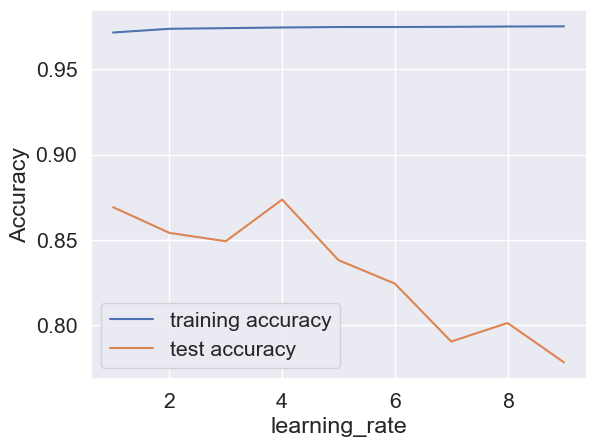

In [83]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [84]:
cat_acc_score = accuracy_score(y_test_20, y_test_cat)
print("Accuracy Score for cat Boosting: \n", cat_acc_score*100)

Accuracy Score for cat Boosting: 
 86.91111111111111


## Random Forest /  Cat Boosting / Gradient Boosting

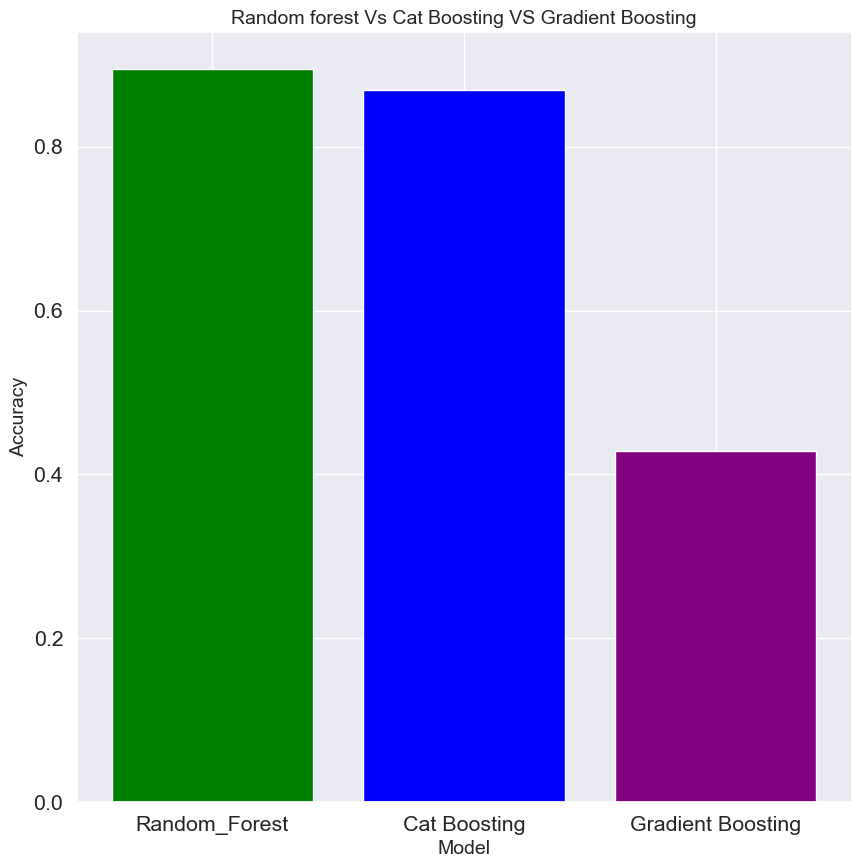

In [85]:
import matplotlib.pyplot as plt
   
Country = ['Random_Forest','Cat Boosting','Gradient Boosting']
GDP_Per_Capita = [acc_score,cat_acc_score,gbc_acc_score]
plt.figure(figsize=(10,10))
New_Colors = ['green','blue','purple']
plt.bar(Country, GDP_Per_Capita, color=New_Colors)
plt.title('Random forest Vs Cat Boosting VS Gradient Boosting', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

## By visualizing the models we can see that our Cat boosting has higher accuracy than other models though it is comparatively old algorithm it performs well than updated algorithm models like random forest model , Gradient Boosting